<a href="https://colab.research.google.com/github/AnnaTumanova/PSO/blob/main/Lab3_dz_convolution_en_s21424.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Convolution

The formula for convolution is as follows:

\begin{equation}
(f * g)(m) = \sum_{n=0}^{N-1}f(n)g(m-n) \qquad \mbox{for }\, m=0..M-1
\end{equation}

Where $N$ is the length of signal $f$ and $M$ is the length of the result.

Implement this function using the basic python operators and loops. Compare your implementation with the optimized `numpy.convolve`.

In [9]:
N=10
L=7

M=N+L-1

f=random.random(size=N)
g=random.random(size=L)
h = zeros(M)

def fn():
  for m in range(M):
    for n in range(N):
      if 0 <= m-n < L:
        h[m]+=f[n]*g[m-n]
  return h
%timeit -n 100 h=fn()
print(h)
%timeit -n 100 h=convolve(f,g)
print(h)
#?convolve

100 loops, best of 3: 95.2 µs per loop
[ 18.46230378  76.66911669 112.01476587 249.43396474 275.29060081
 444.44363381 489.38562956 497.42515604 429.71553922 560.19869322
 242.27586062 454.83173718 241.18065355 227.33333566 231.02742252
  50.06088691]
100 loops, best of 3: 4.8 µs per loop
[ 18.46230378  76.66911669 112.01476587 249.43396474 275.29060081
 444.44363381 489.38562956 497.42515604 429.71553922 560.19869322
 242.27586062 454.83173718 241.18065355 227.33333566 231.02742252
  50.06088691]


## Impulse response

Generate a signal called $g$ of length 10 samples using any random numbers. For the $f$ signal use the Kronecker delta of length 100 samples.

What is the result of the convolution of these two signals? Note the formula and the implementation of convolution to figure out why this is.

In [10]:
N=100
L=10
f=zeros(N)
f[0]=1
g=random.random(size=L)
print(f)
print(g)
print(convolve(f,g))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0.79410424 0.30887249 0.13508088 0.07765552 0.46937945 0.86511753
 0.21497904 0.49250977 0.54402304 0.52558033]
[0.79410424 0.30887249 0.13508088 0.07765552 0.46937945 0.86511753
 0.21497904 0.49250977 0.54402304 0.52558033 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.      

## Convolution reverb

One use of convolution involves a more creative purpose. We can use it to apply the properties of a given environment (room, hall, etc.) on a sterile signal recorded in the studio in order to give it more *character*.

Load the AIR database, which can be downloaded from this page:

http://www.ind.rwth-aachen.de/en/research/tools-downloads/aachen-impulse-response-database/

The files within the database are stored in Matlab format. They can still be easily loaded into Python using the `scipy.io.loadmat` function. After it is loaded
the `h_air` element contains the actual impulse response of the given room and `air_info` contains the basic information about the recording.
Load any file and play back the impulse.

Make (or use) a simple recording and perform a convolution with one of the functions from the database (the larger the room, the longer and more audible the effect).
Make sure that the sampling frequency of the recording and the impulse are the same! You can use the `scipy.signal.resample` to convert between samling.
Note that for long signals, the convolution can take a long time and it may pay off to shorten the impulse (especially if it's very quiet after a second or two).

This effects applies lots of *echo* to the recording. Such a complex *echo* is also known as *reverberation*. There are many mehtods of applying reverberation
(eg. parametric), but this particular one is known as *convolution reverb*.

In [11]:
!wget http://www.openslr.org/resources/20/air_database_release_1_4.zip
!unzip air_database_release_1_4.zip

--2020-11-10 12:55:33--  http://www.openslr.org/resources/20/air_database_release_1_4.zip
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:80... connected.
HTTP request sent, awaiting response... Read error (Connection reset by peer) in headers.
Retrying.

--2020-11-10 12:57:22--  (try: 2)  http://www.openslr.org/resources/20/air_database_release_1_4.zip
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175639439 (168M) [application/zip]
Saving to: ‘air_database_release_1_4.zip’

air_database_releas 100%[===================>] 167.50M  86.6MB/s    in 1.9s    

2020-11-10 13:05:45 (86.6 MB/s) - ‘air_database_release_1_4.zip’ saved [175639439/175639439]

Archive:  air_database_release_1_4.zip
   creating: AIR_1_4/
 extracting: AIR_1_4/air_binaural_aula_carolina_0_1_1_90_3.mat  
 extracting: AIR_1_4/air_binaural_aula_carolina_0_1_2_

In [12]:
!wget !wget https://danijel3.github.io/PSO_lecture/%C4%87wiczenia/zdanie.wav

--2020-11-10 13:53:27--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2020-11-10 13:53:27--  https://danijel3.github.io/PSO_lecture/%C4%87wiczenia/zdanie.wav
Resolving danijel3.github.io (danijel3.github.io)... 185.199.108.153, 185.199.111.153, 185.199.109.153, ...
Connecting to danijel3.github.io (danijel3.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 540980 (528K) [audio/wav]
Saving to: ‘zdanie.wav’

zdanie.wav          100%[===================>] 528.30K  --.-KB/s    in 0.03s   

2020-11-10 13:53:27 (17.2 MB/s) - ‘zdanie.wav’ saved [540980/540980]

FINISHED --2020-11-10 13:53:27--
Total wall clock time: 0.2s
Downloaded: 1 files, 528K in 0.03s (17.2 MB/s)


[[(array(['AIR Database'], dtype='<U12'), array(['(c) 2009 RWTH Aachen University, http://www.ind.rwth-aachen.de'],
      dtype='<U62'), array(['double'], dtype='<U6'), array(['lecture'], dtype='<U7'), array([[0]], dtype=uint8), array([[225]], dtype=uint8), array([[48000]], dtype=uint16), array([[0]], dtype=uint8), array(['air_lecture_0_0_1.mat'], dtype='<U21'))]]


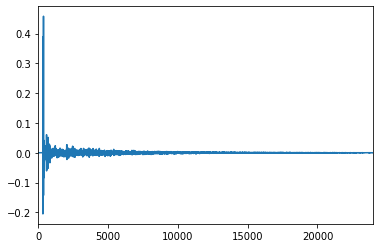

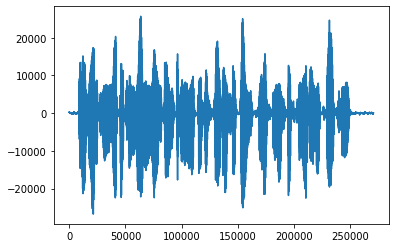

In [15]:
from scipy.io import loadmat
from scipy.io.wavfile import read

f=loadmat("AIR_1_4/air_binaural_lecture_0_0_1.mat")
print(f["air_info"])

samp_freq=48000
i=f["h_air"].flatten()

plot(i)
xlim(0,24000)

from IPython.display import Audio
#Audio(i,rate=samp_freq)

fs,y=read("zdanie.wav")
figure()
plot(y)
Audio(y,rate=samp_freq)


z=convolve(y,i[:24000])
Audio(z,rate=samp_freq)

# Homework

Define some formulas or function to represent two different signals: $f_1$ and $f_2$. You can use the method we used on the previous
lecture, eg: 
```
def signal(x):
    return x**2+1
x=np.linspace(-10,10,100)
plot(x,signal(x))
```

Define a function $f_s$ as the weighted sum of the above signals (use any values for $k_1$ and $k_2$):

\begin{equation}
f_s(x)=k_1\cdot f_1(x) + k_2\cdot f_2(x)
\end{equation}

Define two different systems using the equations below. These systems take both the function $f_s$ and its arguemnts $x$ as inputs:

  1. $H_1(f,x)=f(2x)$
  2. $H_2(f,x)=(f(x))^2$

Use the rules for determining linearity to demonstrate emirically whether each of the above two systems are linear or not.
As a reminder, a linear system should hold under the following condition:

\begin{equation}
H(f_s,x) = k_1 \cdot H(f_1,x) + k_2 \cdot H(f_2,x)
\end{equation}

Text(0.5, 1.0, 'Should be identical as system 2 if it is linear')

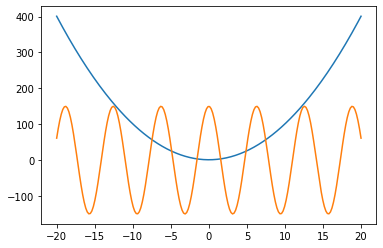

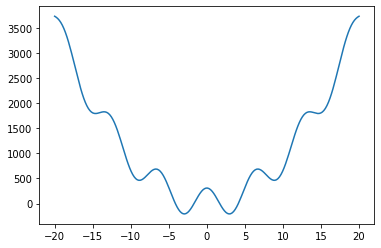

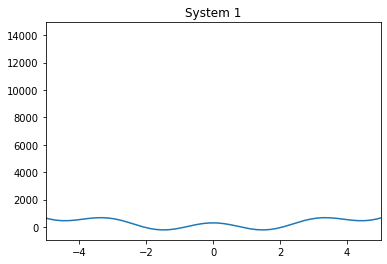

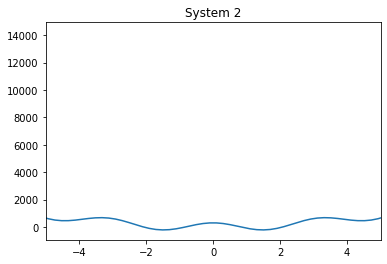

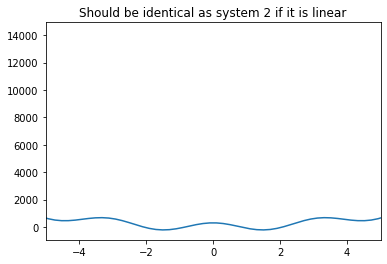

In [25]:
k1=9
k2=2
x=linspace(-20,20,200)

def signal1(x):
    return x**2+1

def signal2(x):
  return cos(x)*150

def weightedSum(x):
  return k1*signal1(x)+k2*signal2(x)

def sys1(f,x):
  return f(x*2)

def sys2(f,x):
  return f(x)**2

#signal1 & signal2
plot(x,signal1(x))
plot(x,signal2(x))

#weighted sum
figure()
plot(x,weightedSum(x))

figure()
plot(x,sys1(weightedSum,x))
xlim(-5,5)
title("System 1")
figure()
xlim(-5,5)
plot(x,k1*sys1(signal1,x)+k2*sys1(signal2,x))
title("Should be identical with system 1 if it is linear")

xlim(-5,5)
title("System 2")
figure()
plot(x,k1*sys1(signal1,x)+k2*sys1(signal2,x))
xlim(-5,5)
title("Should be identical as system 2 if it is linear")